# Aharonov-Bohm effect

<img src='https://upload.wikimedia.org/wikipedia/commons/1/1a/AharonovBohmEffect.svg' width=40%/>
<small style="float:right;">Image [CC-BY-SA-3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en), original by [Kismalac](https://commons.wikimedia.org/wiki/File:AharonovBohmEffect.svg)</small>

In this tutorial, we are going to discuss one of the cornerstone of quantum nanoelectronics,
the Aharonov-Bohm effect. We are going to calculate the conductance of a ring through which one applies a magnetic field.
One interesting aspect of the Aharonov-Bohm effect is that the magnetic field can actually *vanish* in the sample itself. All that is required is that the potential vector does not. This is a very nice proof that in quantum mechanics the electron motion indeed couples to the potential vector, not the magnetic field. This can be seen from the following Gauge transformation: let us consider the Schrodinger equation $H\Psi = E\Psi$ with following Hamiltonian,

$$H = \frac{1}{2m} [ P - eA(R)]^2  + V(R)$$

where $B(r) = \nabla \times A(r) = 0$ inside the sample itself (but not in the hole of the ring). Then the function

$$F(r) = \int_{r_-}^r A(r).dr $$ is well defined independently of the path from $r_-$ to $r$. Let us define,

$$\tilde \Psi(r) = e^{iF(r)} \Psi(r)$$. 

We find that $\tilde \Psi$ obeys the free equation with $H = P^2/2m + V(R)$ to which we add the *boundary condition*,

$$\tilde \Psi(r_+) = e^{iF(r_+)} \tilde \Psi(r_-)$$

with $$F(r_+) = \frac{B S}{\hbar/e}$$



In [2]:
from math import pi
from matplotlib import pyplot
import numpy as np
import kwant
%matplotlib inline

/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:103: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefs = np.linalg.lstsq(vecs_orig.T, vecs.T)[0]
/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  center_coords = np.array(np.round(np.linalg.lstsq(basis.T, vec)[0]), int)


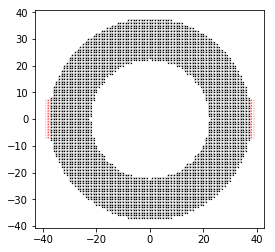

In [35]:
lat=kwant.lattice.square()
L,W=30,16
def myshape(R): return ( 
        (R[0]**2 + R[1]**2) > (L-W/2)**2 and                 
        (R[0]**2 + R[1]**2) < (L+W/2)**2)
H=kwant.Builder()
H[lat.shape(myshape,(L,0) )]=4


H[lat.neighbors()]=1 

def Aharonov_Bohm(site1,site2,phi):
    return np.exp(2j*pi*phi)
    
for hop in H.hoppings():
#     if hop[0].tag[0]==1 and hop[0].tag[1]>0 and hop[1].tag[0]==0:
#         print(hop[0].tag, hop[1].tag)
    H[hop]=Aharonov_Bohm

sym=kwant.TranslationalSymmetry(lat.vec((1,0)))
def lead_shape(R): return abs(R[1]) < W/2 and abs(R[0]) <3
Hlead =kwant.Builder(sym)
Hlead[lat.shape(lead_shape,(0,0) )]=4
Hlead[lat.neighbors()]=1
H.attach_lead(Hlead)
H.attach_lead(Hlead.reversed())
kwant.plot(H);

In [36]:

Hf=H.finalized()
data = []
phis = np.linspace(0,10.,256)
for phi in phis:
    smatrix = kwant.smatrix(Hf, 3.3,args=[phi])
    data.append(smatrix.transmission(1, 0))

Text(0.5,1,'Aharonov-Effect')

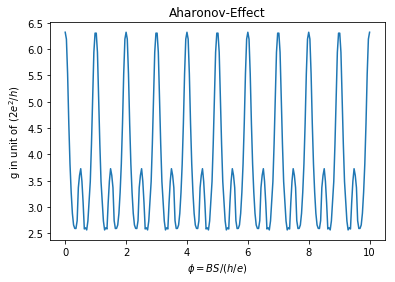

In [37]:
pyplot.plot(phis, data,'-');
pyplot.xlabel('$\phi = BS/(h/e)$')
pyplot.ylabel('g in unit of $(2e^2/h)$');
pyplot.title('Aharonov-Effect')

We see that the Aharonov-Bohm effect contains several harmonics
$$ g = g_0 + g_1 cos(\phi) + g_2 cos(2\phi) + ...$$

## Your turn:

* How can we get just one harmonics (as in most experiments)? 
* Try L = 100 and W= 12, what do you see?
* The results should not depend on the position of the gauge transform, can you check that?


## Your turn:
* Can you make a different sample with an assymetric shape, say an ellipse shape?

# Real magnetic field

In real life it is difficult to put the field only in the hole so experimentalists tend to
apply a uniform field everywhere. Let us modify the script to just do that. You need now to pick up a
phase $\phi$ on each small square. This can be done with the following piece of code - try to modify your code to incorporate this new pieces.
## Your turn:

In [30]:

L,W=100,12

def Field(site1,site2,phi):
    x1,y1=site1.pos
    x2,y2=site2.pos
    return -np.exp(-0.5j * phi * (x1 - x2) * (y1 + y2))

H[lat.neighbors()] = Field



/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  center_coords = np.array(np.round(np.linalg.lstsq(basis.T, vec)[0]), int)


Now run it, don't forget to change the x-scale of the plot.

* Do you understand why the x - scale is so much smaller?
* Do you happen to know what will happen at higher field?

In [31]:

phis = np.linspace(0.,0.0005,50)
